In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import MissingIndicator
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import FeatureUnion, make_pipeline
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score,mean_absolute_error,mean_squared_error,r2_score

from sklearn.linear_model import RidgeCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.manifold import TSNE
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler, QuantileTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

#Dimension reduction
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

import warnings
warnings.filterwarnings("ignore")

In [2]:
# load the dataset
concrete_data = pd.read_csv('concrete.csv')

In [3]:
#verify the loading of the data set
concrete_data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [4]:
# get the data info
concrete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


***Observations***
- There are 1030 rows and 9 columns
- There are no null values
- All the columns are numerical data type
- strength - dependent variable

In [5]:
concrete_data.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


***Observations***

- No feature has standard deviation of zero. so , all the variables have variablity contributing to the Target variable.
- Looking at the median and max value of slag and ash , the data looks high positive skewness with presence of outliers
- Observing the quartile values and max values , it is evident that most of the features are skewed.
- Outlier treatment has to be done.
- Looking at the range (80) and the high standard deviation (17) , we can guess that the target variable has many clusters.
- the standard deviation is high for all the features indicating that there are clusters in the data.
- the age column has a range one day to one year
- Looking at the zero values , we can infer that the four constituents - cement,water,coarse aggregate and fine agrregate are the essential constituents while slag, ash , superplastic are optional.
- As per the data description the each metric is measured in Kg in a cubic meter concrete mixture (so all quantities have the same quantity) , ***so scaling is not required*** .
- since all the columns use the same unit , its easy to compare between the columns.
- comparing the values, the ranking in weight is - coarsegg, fineagg , cement, water, slag , ash, superplastic.

In [6]:
def distribution_plot(feature):
    concrete_data.hist(column = [feature], edgecolor = 'black')
    plt.show()
    sns.boxplot(concrete_data[feature])
    plt.show()
  

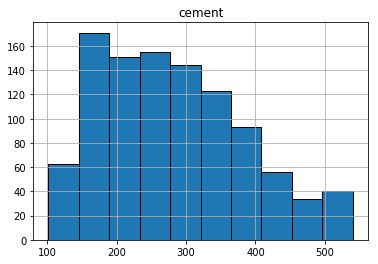

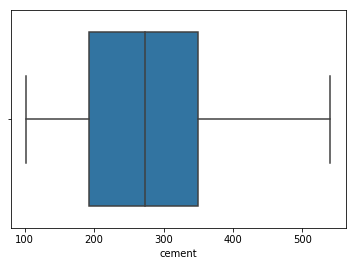

In [7]:
distribution_plot('cement')

The cement data is right skewed.But there are no evident outliers from the box plot.

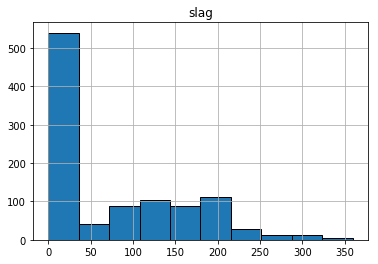

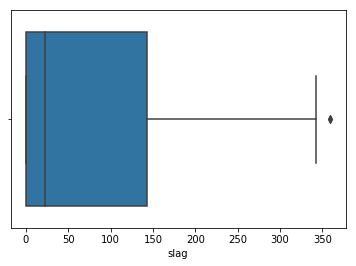

In [8]:
distribution_plot('slag')

Because of the presence of zero the slag is highly skewed  and has outlier on the right end.
Due to lack of domain knowledge , let us assume that slag is an optional element in the concrete and the provided data is not incorrect.

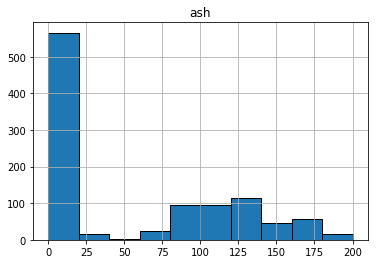

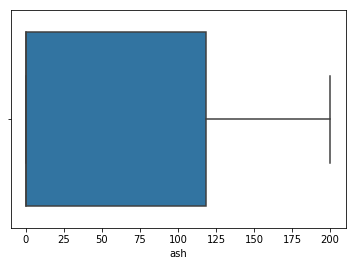

In [9]:
distribution_plot('ash')

Because of the presence of zero the ash is highly skewed  and has outlier on the right end.
Due to lack of domain knowledge , let us assume that ash is an optional element in the concrete and the provided data is not incorrect.
The presence of clusters is visible fromt the multiple peaks.

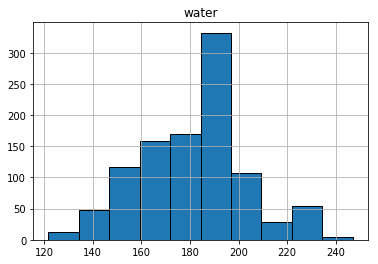

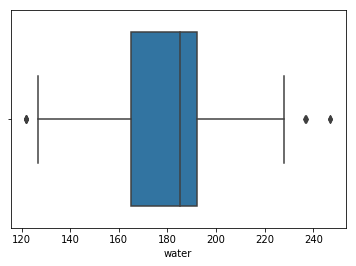

In [10]:
distribution_plot('water')

- The water looks normally distributed. slightly left skewed.
- Presence of outliers is evident from the box plot.
- the middle 50 percent of the population has the range in between 165 to 190.


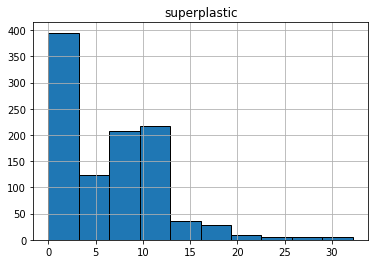

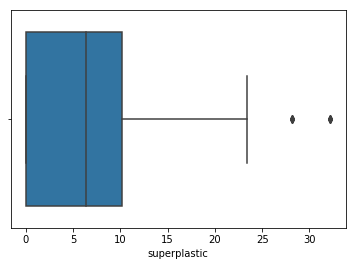

In [11]:
distribution_plot('superplastic')

The superplastic data looks right skewed.Presence of outliers and clusters are visible from the above graph.
Most of the concrete concentration has zero super plastic.

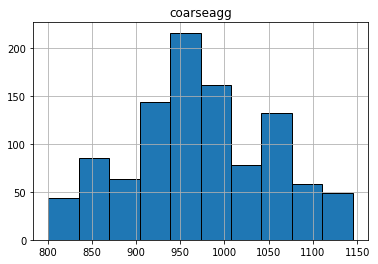

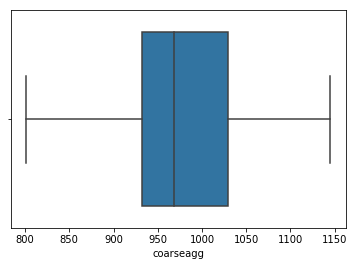

In [12]:
distribution_plot('coarseagg')

The coarseagg data looks like normally distributed with more than one gaussian.
Outliers are not seen.
The middle range lies between 925 to 1025.

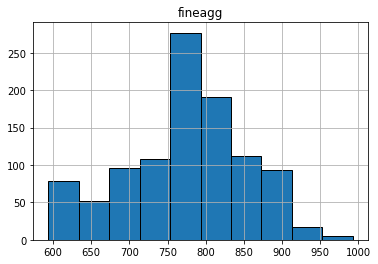

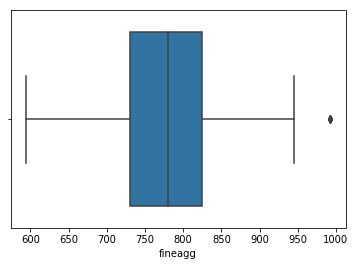

In [13]:
distribution_plot('fineagg')

fineagg data looks normally distributed wiht slight left skewness. Outliers are present.

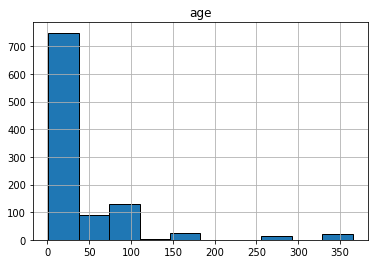

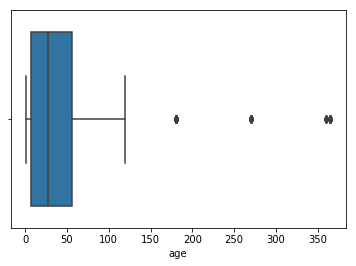

In [14]:
distribution_plot('age')

The age data is highly right skewed. More than 70 percent of the data has day less than 50. nearly one and half month.
It is very rare that the age goes beyond 100 days.
The extreme end goes to outliers.

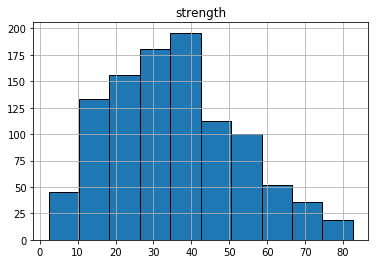

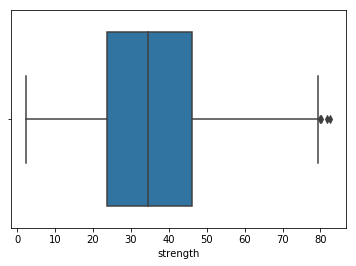

In [15]:
distribution_plot('strength')

The strength data looks normally distributed.

With little bit of literature work ,it is found that the concrete can be classified into three categories based on strength :
1. Low grade : 5 to 20
2. standard grade : 25 to 45
3. high strength concrete : above 45

Reference : https://www.baseconcrete.co.uk/different-types-of-concrete-grades-and-their-uses/

In [16]:
concrete_data_categorized = concrete_data.copy()
cut_points = [2,20,45,83]
label_names = ["Low grade","Standard grade","High strength"]
concrete_data_categorized["strength_categories"] = pd.cut(concrete_data_categorized["strength"],
                                             cut_points,labels=label_names)

In [17]:
concrete_data_categorized.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,strength_categories
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,Standard grade
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51,Standard grade
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,Standard grade
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,High strength
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,Low grade


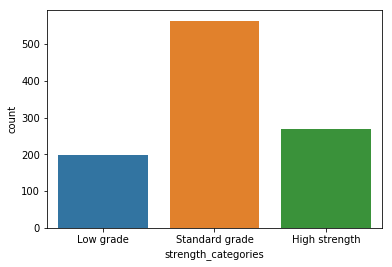

In [18]:
sns.countplot(concrete_data_categorized.strength_categories)

In the given data, we have half of the data in the standard grade of strength category - between 25 to 45.

In [19]:
def strength_category_plot(feature):
    sns.catplot(x='strength_categories' , y = feature, data = concrete_data_categorized)
    plt.show()

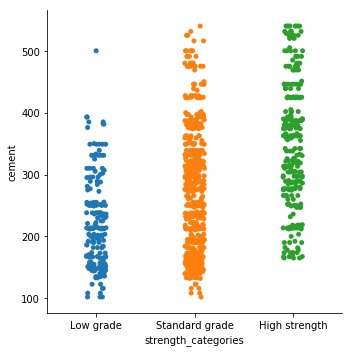

In [20]:
strength_category_plot('cement')

From the above graph, we can understand that 
- for high strength grades, the cement concentration is more comparatively . It starts above 200 kg in m3 mixture.
- for low grade , the cement concentrartion is low , it rarely goes above 400.
- for standard grade , the value varies for the complete range of cement.


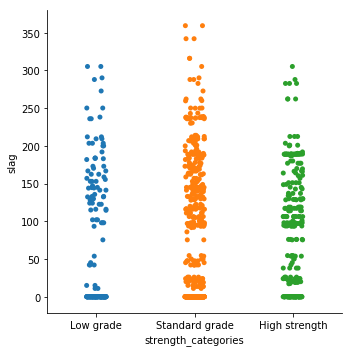

In [21]:
strength_category_plot('slag')

There is no patter observed for slag between different strength categories

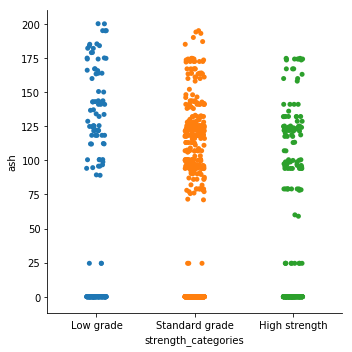

In [22]:
strength_category_plot('ash')

Ash has higher concentration for Low grade concretes compared to other categories.

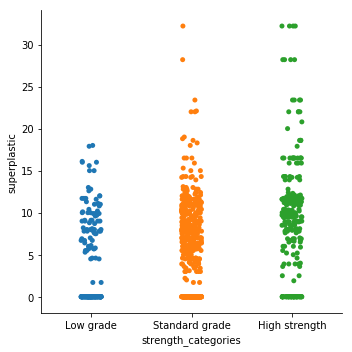

In [23]:
strength_category_plot('superplastic')

The value of superplastic goes beyond mostly for high grade cements and sometimes for standard grade

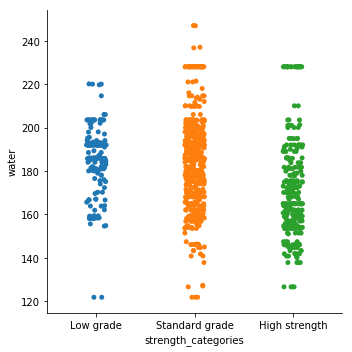

In [24]:
strength_category_plot('water')

The water content is high for low grade concretes compared to other two categories.

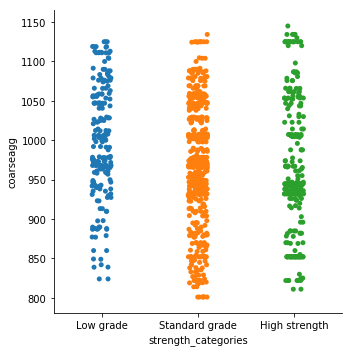

In [25]:
strength_category_plot('coarseagg')

No distinct pattern can be observed between coarse aggregate and strength categories

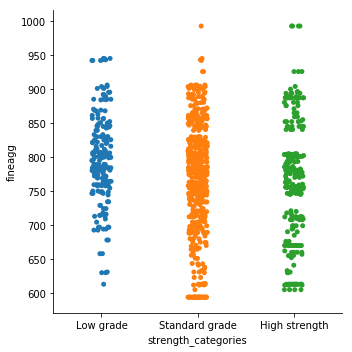

In [26]:
strength_category_plot('fineagg')

No distinct pattern can be observed between fine aggregate and strength categories

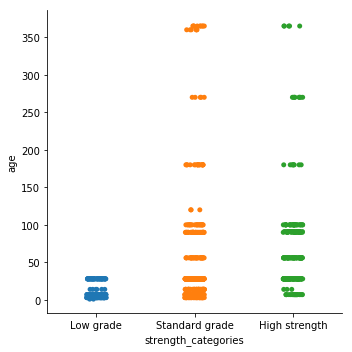

In [27]:
strength_category_plot('age')

Clearly , the age is less than 40 days for low grade concretes.
For the standard grades and high grades , higher days of age are shown.

In [28]:
zero_rows = concrete_data_categorized.query('slag == 0 and ash == 0 and superplastic ==0')

len(zero_rows)

209

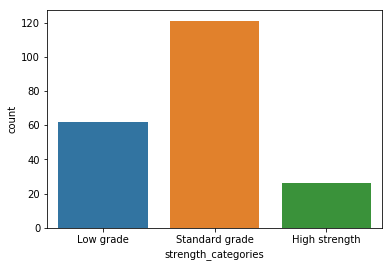

In [29]:
sns.countplot(zero_rows.strength_categories)

Though, we can see that out of 209 rows which had the values zero , more than 120 are standard grade, we cannot conclude any pattern or trend because of the class imbalance in the data available.

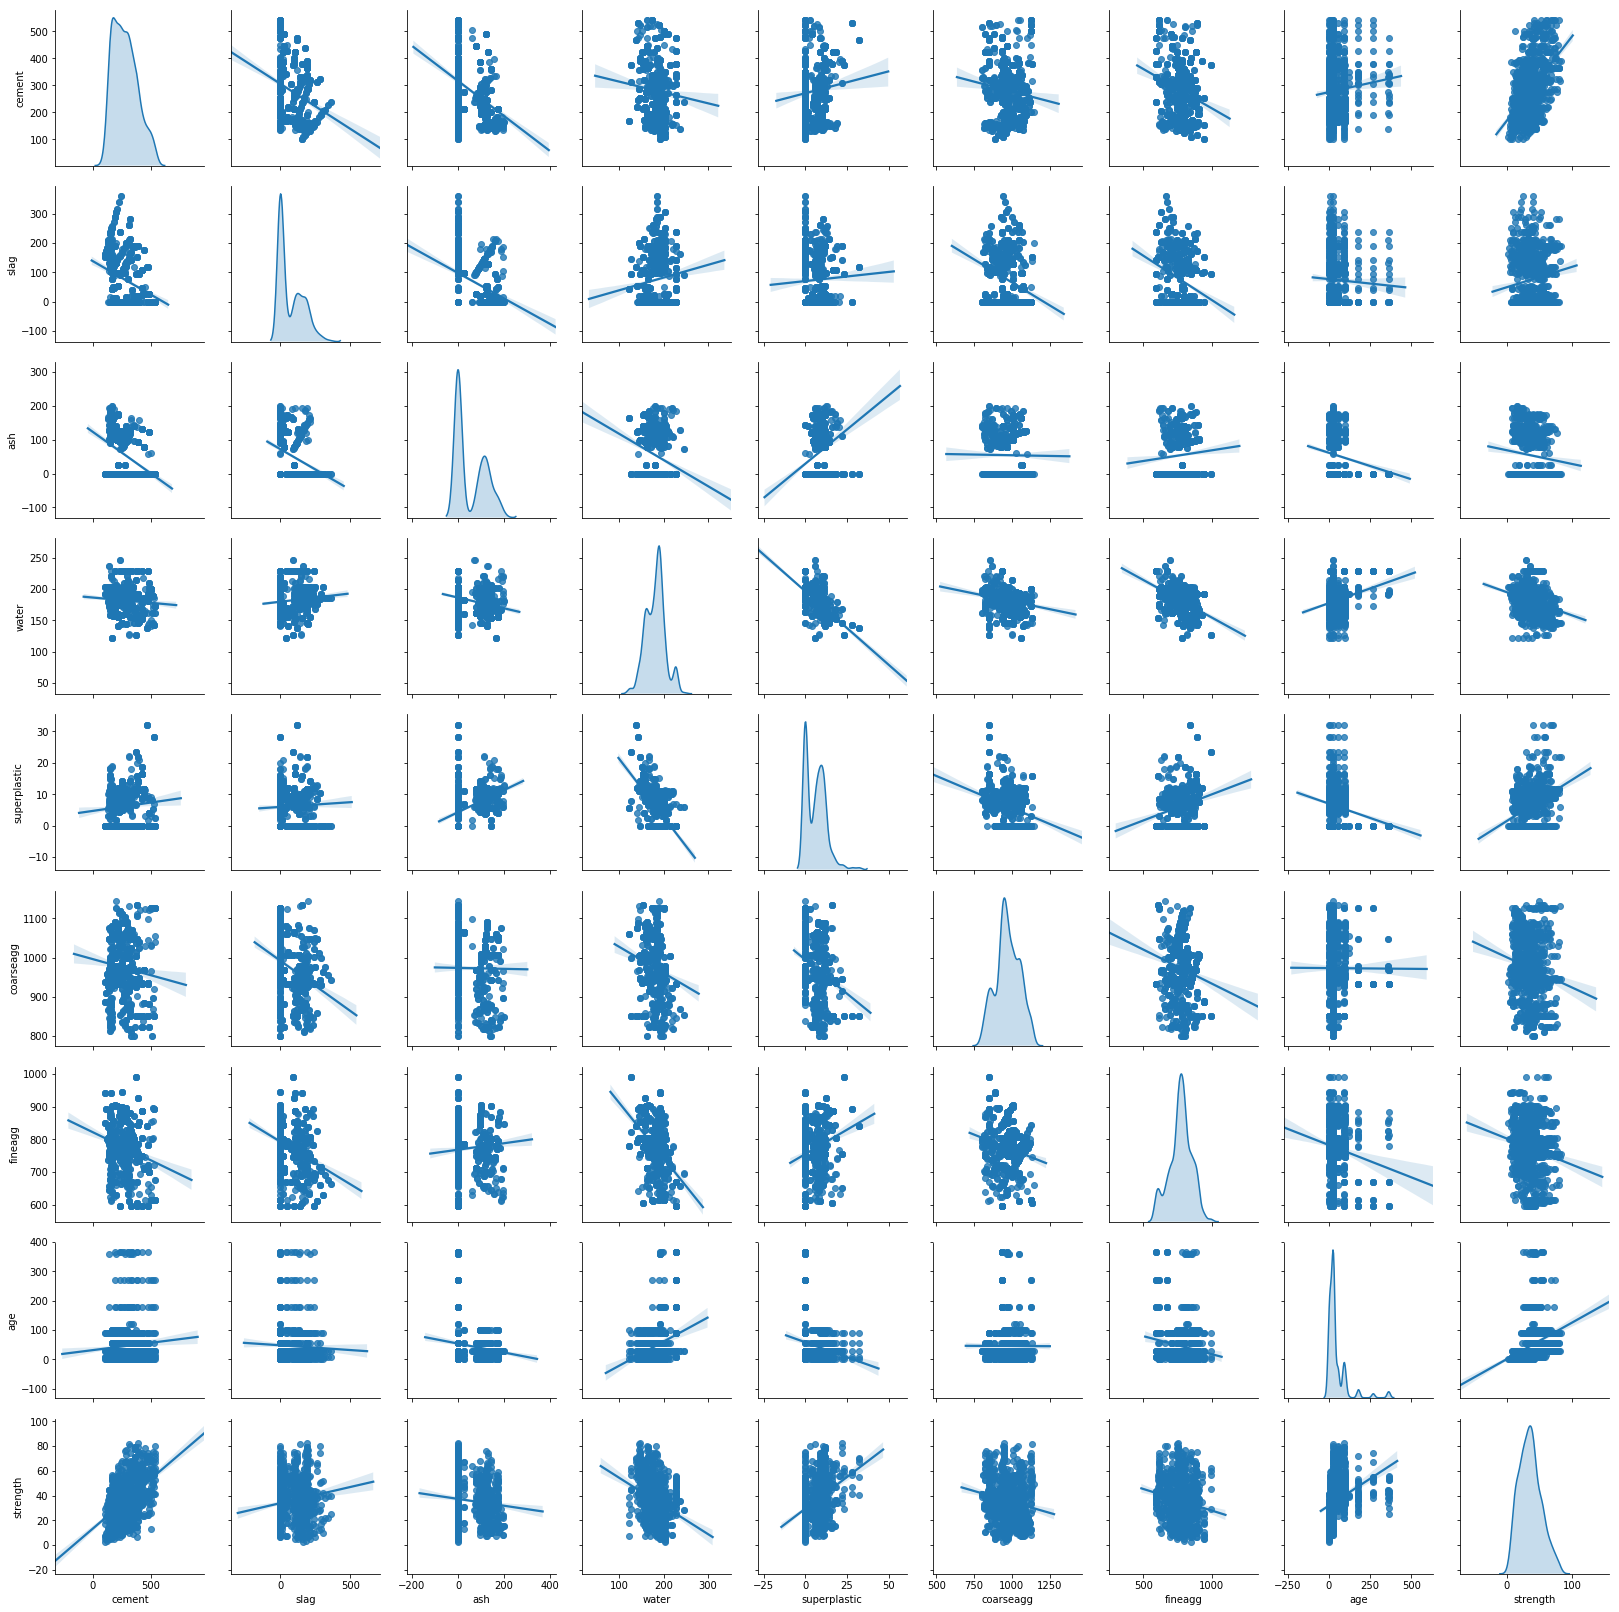

In [30]:
sns.pairplot(concrete_data ,diag_kind='kde' , kind ='reg')

***Observations***
 
- from the diagonal , we can observe that multiple gaussians are present for every feature.
- the best fit line from the linear reggression is not able to predict clearly for any of the variable combination.
- No two feature is showing strong correlation , indicating absence of multi-collinearity among indepedent variables.
- strength looks positively correlated with cement and superplastic.

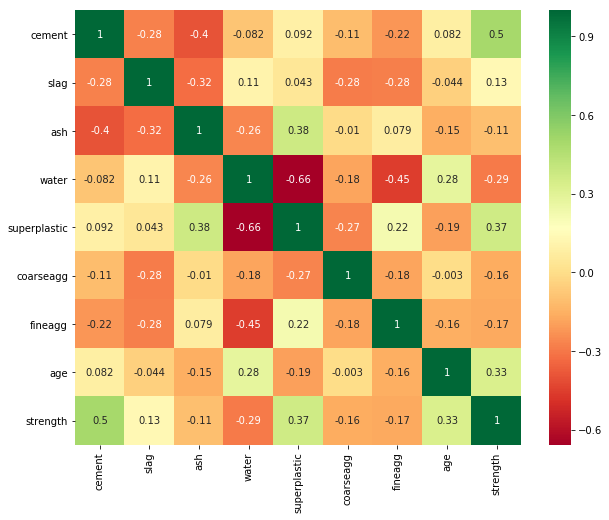

In [31]:
corr =concrete_data.corr()
#heatmap helps in visualization of different correlation.
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,cmap='RdYlGn')

- As observed from pairplot , it is evident in the correlation heat map also that no two feature is showing strong correlation.
- cement has positive correlation with strength
- superplastic and age has higher correlation with strength compared to other variables
- superplastic and water has high negative correlation.

In [32]:
# find the stats model to check the p value for every indepedent variable
#Eda with linear regression
est = sm.OLS(concrete_data['strength'],concrete_data.drop('strength', axis=1) )
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     1732.
Date:                Sun, 20 Oct 2019   Prob (F-statistic):               0.00
Time:                        21:01:20   Log-Likelihood:                -3869.4
No. Observations:                1030   AIC:                             7755.
Df Residuals:                    1022   BIC:                             7794.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
cement           0.1134      0.004     26.692   

***observations***

- From the above summary, it is clear that the P value is near to zero for all the variables
- P value indicate how the feature does not affect the depedent variable.
- very low values of P (< 0.05) indicate that every feature contributes to the prediction of the dependent variable.

<b><font size = 5>Summmary of EDA</font></b>

- The data has many clusters for each feature. so the guess is non linear models work better at prediction.
- Even polynomial model can be used.
- The data doesnot have high collinearity indicating the absence of multi-collinearity
- The data has high skewness and outliers are present. Outlier treatment is necessary
- All the provided features contribute to the prediction of concrete strength, so no feature can be dropped.

In [33]:
#utility function to detect outliers with the help of z score
def detect_outlier(data_1):
    """ detect outlier from the normally distributed data with z score above 3 """
    outliers=[]
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [34]:
def print_outliers_in_dataFrame(data_frame):
    for key , value in data_frame.iteritems():
        outliers = detect_outlier(value)
        print(key,outliers) 

In [35]:
def impute_outlier_with_null(data_frame):
    z_score = np.abs(stats.zscore(data_frame))
    data_frame[z_score > 3] = np.nan
    return data_frame

In [36]:
knn_estimator = KNeighborsRegressor(n_neighbors=3) # create KNN regressor with 4 nearest neighbours
imputer = IterativeImputer(estimator = knn_estimator, random_state=0) #create the imputer-SKlearn-Iterative-Imputer

In [37]:
imputer.get_params

<bound method BaseEstimator.get_params of IterativeImputer(add_indicator=False,
                 estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                               metric='minkowski',
                                               metric_params=None, n_jobs=None,
                                               n_neighbors=3, p=2,
                                               weights='uniform'),
                 imputation_order='ascending', initial_strategy='mean',
                 max_iter=10, max_value=None, min_value=None,
                 missing_values=nan, n_nearest_features=None, random_state=0,
                 sample_posterior=False, tol=0.001, verbose=0)>

In [38]:
def impute_outlier_with_regression(X_train_imputed):
    X_train_imputed = impute_outlier_with_null(X_train_imputed)
    X_imputed = imputer.fit_transform(X_train_imputed)
    X_train_imputed = pd.DataFrame(data = X_imputed ,columns = X_train.columns )
    print_outliers_in_dataFrame(X_train_imputed)
    return X_train_imputed

In [39]:
concrete_data_copy = concrete_data.copy()
#split the X and Y columns
X = concrete_data_copy.drop('strength', axis=1)
y = concrete_data_copy['strength']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [40]:
X_train_imputed = X_train.copy()

In [41]:
print_outliers_in_dataFrame(X_train_imputed)

cement []
slag [359.4, 342.1, 342.1]
ash []
water [247.0, 246.9]
superplastic [28.2, 32.2, 32.2, 32.2, 32.2, 32.2, 28.2, 28.2]
coarseagg []
fineagg []
age [270, 360, 270, 365, 360, 360, 360, 360, 270, 365, 365, 270, 270, 365, 365, 365, 365, 365, 270, 270, 365, 270, 270, 365]


In [42]:
#Iteration 1 : Imputation
X_train_imputed = impute_outlier_with_regression(X_train_imputed)

cement []
slag []
ash []
water []
superplastic [23.4, 22.1, 23.4, 23.4]
coarseagg []
fineagg []
age [180.0, 180.0, 180.0, 180.0, 180.0, 180.0, 180.0, 180.0, 180.0, 180.0, 180.0, 180.0, 180.0, 180.0, 180.0, 180.0, 180.0, 180.0]


In [43]:
#Iteration 2 : Imputation
X_train_imputed = impute_outlier_with_regression(X_train_imputed)

cement []
slag []
ash []
water []
superplastic [22.0, 22.0, 22.0, 22.0]
coarseagg []
fineagg []
age []


In [44]:
#Iteration 3 : Imputation
X_train_imputed = impute_outlier_with_regression(X_train_imputed)

cement []
slag []
ash []
water []
superplastic []
coarseagg []
fineagg []
age []


we have got rid of all the outliers with the third iteration.

# Regression

# Regularization techniques

In [45]:
metrics_df = None
def get_regression_metrics(name,y_true ,y_pred,length_coeff):
    """ utility method to return the regression metrics"""
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    
    r2 = r2_score(y_true, y_pred) 
    #adj_r2 = 1 - float(len(y_true)-1)/(len(y_true)-len(coefficient_list)-1)*(1 - r2_score)
    
    adj_r2 = 1 - (1-r2)*(len(y_true)-1)/(len(y_true)-length_coeff-1)
    
    explained_variance= explained_variance_score(y_true, y_pred)
    
    data = {'Regressor_name':[name],'mae':[mae], 'rmse':[rmse],'r2_score':[r2],'adj_r2':[adj_r2] ,'explained_variance':[explained_variance]} 
    metrics_df = pd.DataFrame(data)
    return metrics_df

From our EDA , we understood simple linear regression will not work because of the clusters.
so going to regularized models.

In [46]:
#Ridge regression
X_train_Ridge = X_train_imputed.copy()
ridgeCV = RidgeCV().fit(X_train_Ridge, y_train)
y_pred = ridgeCV.predict(X_test)

In [47]:
evaluation_summary = get_regression_metrics("ridgeBasic",y_test,y_pred,len(ridgeCV.coef_ ))

In [48]:
evaluation_summary

,Regressor_name,mae,rmse,r2_score,adj_r2,explained_variance
0,ridgeBasic,9.033512,15.466566,0.178068,0.15615,0.205589


simple ridge regression did not yield results.

 - R2 score is only 0.17 which means only 17 percent of the regression error is counted by this model
 - mean abosulte error is also too high , for a range of 80 , the error of 9 is big.
 - root mean square error is also high.

# Hypertuning the model

In [49]:
n_folds = 5
scaling_options = [StandardScaler(), RobustScaler(), QuantileTransformer()]
pipe = Pipeline([
 ('scaler', StandardScaler()),
 ('model_gs' , Ridge(random_state=42))
])
param_grid_models = [
 {'scaler': scaling_options,
 'model_gs' : [Ridge(random_state=42)],
 'model_gs__alpha' : [0.001, 0.01, 0.05, 0.1, 0.5, 1],
 'model_gs__random_state': [42]
 }
]
    
gsc = GridSearchCV(pipe, param_grid = param_grid_models,cv = n_folds, verbose=0, n_jobs=-1)

In [50]:
ridge_regression = gsc.fit(X_train_imputed, y_train)
y_pred_ridge = ridge_regression.predict(X_test)
ridge_regression.best_estimator_, ridge_regression.best_score_

(Pipeline(memory=None,
          steps=[('scaler',
                  QuantileTransformer(copy=True, ignore_implicit_zeros=False,
                                      n_quantiles=1000,
                                      output_distribution='uniform',
                                      random_state=None, subsample=100000)),
                 ('model_gs',
                  Ridge(alpha=0.1, copy_X=True, fit_intercept=True,
                        max_iter=None, normalize=False, random_state=42,
                        solver='auto', tol=0.001))],
          verbose=False), 0.8063633378937992)

In [51]:
evaluation_summary= pd.concat([evaluation_summary ,get_regression_metrics("hyper-tuned-ridge",y_test,y_pred_ridge,8 )])
evaluation_summary

,Regressor_name,mae,rmse,r2_score,adj_r2,explained_variance
0,ridgeBasic,9.033512,15.466566,0.178068,0.156150,0.205589
0,hyper-tuned-ridge,5.718237,7.295992,0.817099,0.812221,0.817241


- The hyper tuned model gives a high performance imporvement compared to basic model.
- This tells us that initial parameter selection was not appropriate.
- The R-squared and adjusted R-squared value has come to 81
- The explained variance is also 81

In [52]:
#coeff_values = pd.DataFrame(data=, columns = X_train.columns)
ridge_regression.best_estimator_[1].coef_ 
coef_df = pd.DataFrame(ridge_regression.best_estimator_[1].coef_,X_train.columns, columns=['coeff'])

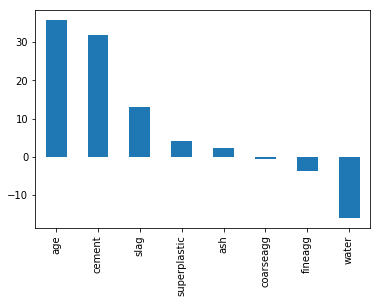

In [53]:
df = coef_df.sort_values(['coeff'],ascending=False).T
row = df.iloc[0]
row.plot(kind='bar')
plt.show()

- Age and cement looks like the feature with highest importance.

In [54]:
from sklearn.preprocessing import PolynomialFeatures

concrete_data_copy1 = concrete_data.copy()
#split the X and Y columns
X_copy = concrete_data_copy1.drop('strength', axis=1)
y_copy = concrete_data_copy1['strength']


poly = PolynomialFeatures(degree = 3, interaction_only=True)
X_poly = poly.fit_transform(X_copy)
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y_copy, test_size=0.30, random_state=1)
X_train_poly.shape

(721, 93)

Now we got 93 features for the data by creating polynomial features with the existing features.

In [55]:
ridge_regression = gsc.fit(X_train_poly, y_train_poly)
y_pred_ridge = ridge_regression.predict(X_test_poly)
ridge_regression.best_estimator_, ridge_regression.best_score_

(Pipeline(memory=None,
          steps=[('scaler',
                  QuantileTransformer(copy=True, ignore_implicit_zeros=False,
                                      n_quantiles=1000,
                                      output_distribution='uniform',
                                      random_state=None, subsample=100000)),
                 ('model_gs',
                  Ridge(alpha=0.05, copy_X=True, fit_intercept=True,
                        max_iter=None, normalize=False, random_state=42,
                        solver='auto', tol=0.001))],
          verbose=False), 0.8643619189131896)

In [56]:
evaluation_summary= pd.concat([evaluation_summary ,get_regression_metrics("hyper-tuned-ridge_poly",y_test_poly,y_pred_ridge,93 )])
evaluation_summary

,Regressor_name,mae,rmse,r2_score,adj_r2,explained_variance
0,ridgeBasic,9.033512,15.466566,0.178068,0.156150,0.205589
0,hyper-tuned-ridge,5.718237,7.295992,0.817099,0.812221,0.817241
0,hyper-tuned-ridge_poly,4.888082,6.526500,0.853645,0.790337,0.854130


In [57]:
coef_df = pd.DataFrame(ridge_regression.best_estimator_[1].coef_, pd.DataFrame(X_train_poly).columns, columns=['coeff'])

In [58]:
def plot_feature_importance(coef_df):
    df = coef_df.sort_values(['coeff'],ascending=False).T
    row = df.iloc[0,0:9]
    row.plot(kind='bar')
    plt.show()

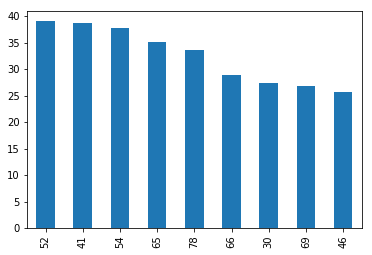

In [59]:
plot_feature_importance(coef_df)

In [60]:
from sklearn.linear_model import Lasso
pipe = Pipeline([
 ('scaler', StandardScaler()),
 ('model_gs' , Lasso(random_state=42))
])
param_grid_models = [
 {'scaler': scaling_options,
 'model_gs' : [Lasso(random_state=42)],
 'model_gs__alpha' : [0.001, 0.01, 0.05, 0.1, 0.5, 1],
 'model_gs__random_state': [42]
 }
]
#choosing njobs as -1 to have parallel processing
gsc_lasso = GridSearchCV(pipe, param_grid = param_grid_models,cv = n_folds, verbose=True, n_jobs=-1)

In [61]:
lasso_regression = gsc_lasso.fit(X_train_poly, y_train_poly)
y_pred_lasso = lasso_regression.predict(X_test_poly)
lasso_regression.best_estimator_, lasso_regression.best_score_

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.5s finished


(Pipeline(memory=None,
          steps=[('scaler',
                  QuantileTransformer(copy=True, ignore_implicit_zeros=False,
                                      n_quantiles=1000,
                                      output_distribution='uniform',
                                      random_state=None, subsample=100000)),
                 ('model_gs',
                  Lasso(alpha=0.001, copy_X=True, fit_intercept=True,
                        max_iter=1000, normalize=False, positive=False,
                        precompute=False, random_state=42, selection='cyclic',
                        tol=0.0001, warm_start=False))],
          verbose=False), 0.8613052320255578)

In [62]:
evaluation_summary= pd.concat([evaluation_summary ,get_regression_metrics("hyper-tuned-lasso_poly",y_test_poly,y_pred_lasso,93 )])
evaluation_summary

,Regressor_name,mae,rmse,r2_score,adj_r2,explained_variance
0,ridgeBasic,9.033512,15.466566,0.178068,0.156150,0.205589
0,hyper-tuned-ridge,5.718237,7.295992,0.817099,0.812221,0.817241
0,hyper-tuned-ridge_poly,4.888082,6.526500,0.853645,0.790337,0.854130
0,hyper-tuned-lasso_poly,4.942043,6.493690,0.855112,0.792440,0.855456


In [63]:
coef_df = pd.DataFrame(lasso_regression.best_estimator_[1].coef_, pd.DataFrame(X_train_poly).columns, columns=['coeff'])

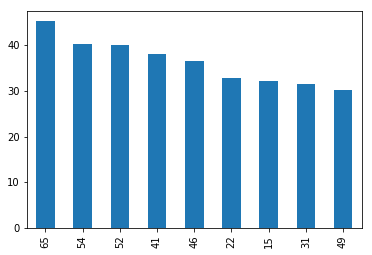

In [64]:
plot_feature_importance(coef_df)

# Ensemble techniques

In [65]:
from sklearn.tree import DecisionTreeRegressor

In [66]:
pipe = Pipeline([
 ('scaler', StandardScaler()),
 ('model_gs' , DecisionTreeRegressor(random_state=42))
])
param_grid_models = [
 {'scaler': scaling_options,
 'model_gs' : [DecisionTreeRegressor(random_state=42)],
 'model_gs__max_depth' : [2,4,5,10],
 'model_gs__max_leaf_nodes' : [5,20,15,20,50,100],
 'model_gs__min_samples_split' : [10,20],
 'model_gs__criterion' : ["mse", "mae"]
 }
]
#choosing njobs as -1 to have parallel processing
grid_dt = GridSearchCV(pipe, param_grid = param_grid_models,cv = n_folds, verbose=True, n_jobs=-1)

In [67]:
dt_regression = grid_dt.fit(X_train_poly, y_train_poly)
y_pred_lasso = dt_regression.predict(X_test_poly)
dt_regression.best_estimator_, dt_regression.best_score_

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 996 tasks      | elapsed:   29.1s
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  1.0min finished


(Pipeline(memory=None,
          steps=[('scaler',
                  StandardScaler(copy=True, with_mean=True, with_std=True)),
                 ('model_gs',
                  DecisionTreeRegressor(criterion='mse', max_depth=10,
                                        max_features=None, max_leaf_nodes=100,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=10,
                                        min_weight_fraction_leaf=0.0,
                                        presort=False, random_state=42,
                                        splitter='best'))],
          verbose=False), 0.8047086501886033)

In [68]:
evaluation_summary= pd.concat([evaluation_summary ,get_regression_metrics("hyper-tuned-DT_poly",y_test_poly,y_pred_lasso,93 )])
evaluation_summary

,Regressor_name,mae,rmse,r2_score,adj_r2,explained_variance
0,ridgeBasic,9.033512,15.466566,0.178068,0.156150,0.205589
0,hyper-tuned-ridge,5.718237,7.295992,0.817099,0.812221,0.817241
0,hyper-tuned-ridge_poly,4.888082,6.526500,0.853645,0.790337,0.854130
0,hyper-tuned-lasso_poly,4.942043,6.493690,0.855112,0.792440,0.855456
0,hyper-tuned-DT_poly,4.942530,7.007215,0.831291,0.758314,0.831326


In [69]:
coef_df = pd.DataFrame(dt_regression.best_estimator_[1].feature_importances_, pd.DataFrame(X_train_poly).columns, columns=['coeff'])

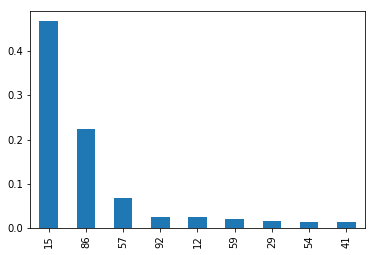

In [70]:
plot_feature_importance(coef_df)

In [71]:
pipe = Pipeline([
 ('scaler', StandardScaler()),
 ('model_gs' , RandomForestRegressor(random_state=42))
])
param_grid_models = [
 {'scaler': scaling_options,
 'model_gs' : [RandomForestRegressor(random_state=42)],
 'model_gs__max_depth': [24, 32, 40],
 'model_gs__min_samples_leaf': [1, 2],
 'model_gs__n_estimators': [16, 32,64,80,128, 256],
 'model_gs__max_features': ['auto', 'sqrt'],
 'model_gs__n_jobs':[-1],
 }
]
#choosing njobs as -1 to have parallel processing
grid_random_forest = GridSearchCV(pipe, param_grid = param_grid_models,cv = n_folds, verbose=True, n_jobs=-1)

In [72]:
random_regression = grid_random_forest.fit(X_train_poly, y_train_poly)
y_pred_rf = random_regression.predict(X_test_poly)
random_regression.best_estimator_, random_regression.best_score_

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  5.5min finished


(Pipeline(memory=None,
          steps=[('scaler',
                  StandardScaler(copy=True, with_mean=True, with_std=True)),
                 ('model_gs',
                  RandomForestRegressor(bootstrap=True, criterion='mse',
                                        max_depth=32, max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=128, n_jobs=-1,
                                        oob_score=False, random_state=42,
                                        verbose=0, warm_start=False))],
          verbose=False), 0.8884043058623246)

In [73]:
evaluation_summary= pd.concat([evaluation_summary ,get_regression_metrics("hyper-tuned-RandomForest_poly",y_test_poly,y_pred_rf,93 )])
evaluation_summary

,Regressor_name,mae,rmse,r2_score,adj_r2,explained_variance
0,ridgeBasic,9.033512,15.466566,0.178068,0.156150,0.205589
0,hyper-tuned-ridge,5.718237,7.295992,0.817099,0.812221,0.817241
0,hyper-tuned-ridge_poly,4.888082,6.526500,0.853645,0.790337,0.854130
0,hyper-tuned-lasso_poly,4.942043,6.493690,0.855112,0.792440,0.855456
0,hyper-tuned-DT_poly,4.942530,7.007215,0.831291,0.758314,0.831326
0,hyper-tuned-RandomForest_poly,3.550838,5.235671,0.905813,0.865071,0.906540


# Hypertuning with Feature Selection

In [74]:
from sklearn.feature_selection import SelectFromModel

In [77]:
from sklearn.feature_selection import RFE

In [79]:
X_train_poly_copy = X_train_poly.copy()
y_train_poly_copy = y_train_poly.copy()
sel_ = RFE(RandomForestRegressor(n_estimators=128), n_features_to_select=20)
sel_.fit(X_train_poly_copy, y_train_poly_copy)

RFE(estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                    max_depth=None, max_features='auto',
                                    max_leaf_nodes=None,
                                    min_impurity_decrease=0.0,
                                    min_impurity_split=None, min_samples_leaf=1,
                                    min_samples_split=2,
                                    min_weight_fraction_leaf=0.0,
                                    n_estimators=128, n_jobs=None,
                                    oob_score=False, random_state=None,
                                    verbose=0, warm_start=False),
    n_features_to_select=20, step=1, verbose=0)

In [80]:
sel_.get_support()

array([False,  True, False, False,  True, False, False, False, False,
       False, False, False,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False,  True, False,  True,  True, False, False,
       False, False, False, False, False, False,  True,  True, False,
        True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False,  True])

In [92]:
X_train_poly_df = pd.DataFrame(X_train_poly_copy)
X_test_poly_df = pd.DataFrame(X_test_poly)
selected_feat = X_train_poly_df.columns[(sel_.get_support())]

In [93]:
X_train_poly_selected = X_train_poly_df[selected_feat]
X_test_poly_selected = X_test_poly_df[selected_feat]
#X_test_poly_selected

In [94]:
random_regression = grid_random_forest.fit(X_train_poly_selected, y_train_poly)
y_pred_rf = random_regression.predict(X_test_poly_selected)
random_regression.best_estimator_, random_regression.best_score_

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   37.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  2.8min finished


(Pipeline(memory=None,
          steps=[('scaler',
                  QuantileTransformer(copy=True, ignore_implicit_zeros=False,
                                      n_quantiles=1000,
                                      output_distribution='uniform',
                                      random_state=None, subsample=100000)),
                 ('model_gs',
                  RandomForestRegressor(bootstrap=True, criterion='mse',
                                        max_depth=32, max_features='sqrt',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=128, n_jobs=-1,
                                        oob_score=False, random_state=42,
    

In [95]:
evaluation_summary= pd.concat([evaluation_summary ,get_regression_metrics("hyper-tuned-RandomForest_poly_feature_selection",y_test_poly,y_pred_rf,20 )])
evaluation_summary

,Regressor_name,mae,rmse,r2_score,adj_r2,explained_variance
0,ridgeBasic,9.033512,15.466566,0.178068,0.156150,0.205589
0,hyper-tuned-ridge,5.718237,7.295992,0.817099,0.812221,0.817241
0,hyper-tuned-ridge_poly,4.888082,6.526500,0.853645,0.790337,0.854130
0,hyper-tuned-lasso_poly,4.942043,6.493690,0.855112,0.792440,0.855456
0,hyper-tuned-DT_poly,4.942530,7.007215,0.831291,0.758314,0.831326
0,hyper-tuned-RandomForest_poly,3.550838,5.235671,0.905813,0.865071,0.906540
0,hyper-tuned-RandomForest_poly_feature_selection,3.704761,5.351112,0.901613,0.894781,0.902354


# Hypertuning with PCA -  Dimensionality reduction by Data aggregation

In [99]:
pca = PCA(n_components=18)
pca.fit(X_train_poly_df)

PCA(copy=True, iterated_power='auto', n_components=18, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

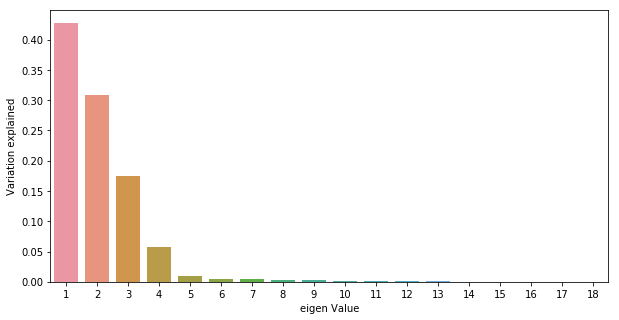

In [100]:
plt.figure(figsize=(10,5))
sns.barplot(x = list(range(1,19)), y= pca.explained_variance_ratio_)
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

From the elbow method , we find that PCA of n_components = 5 gives the necessary variance required.


In [102]:
pca6 = PCA(n_components=6)
pca6.fit(X_train_poly_df)
X_train_pca = pca6.transform(X_train_poly_df)
X_test_pca = pca6.transform(X_test_poly_df)

In [103]:
random_regression = grid_random_forest.fit(X_train_pca, y_train_poly)
y_pred_rf = random_regression.predict(X_test_pca)
random_regression.best_estimator_, random_regression.best_score_

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   24.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   52.5s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  2.1min finished


(Pipeline(memory=None,
          steps=[('scaler',
                  QuantileTransformer(copy=True, ignore_implicit_zeros=False,
                                      n_quantiles=1000,
                                      output_distribution='uniform',
                                      random_state=None, subsample=100000)),
                 ('model_gs',
                  RandomForestRegressor(bootstrap=True, criterion='mse',
                                        max_depth=32, max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=128, n_jobs=-1,
                                        oob_score=False, random_state=42,
    

In [104]:
evaluation_summary= pd.concat([evaluation_summary ,get_regression_metrics("hyper-tuned-RandomForest_poly_pca",y_test_poly,y_pred_rf,20 )])
evaluation_summary

,Regressor_name,mae,rmse,r2_score,adj_r2,explained_variance
0,ridgeBasic,9.033512,15.466566,0.178068,0.156150,0.205589
0,hyper-tuned-ridge,5.718237,7.295992,0.817099,0.812221,0.817241
0,hyper-tuned-ridge_poly,4.888082,6.526500,0.853645,0.790337,0.854130
0,hyper-tuned-lasso_poly,4.942043,6.493690,0.855112,0.792440,0.855456
0,hyper-tuned-DT_poly,4.942530,7.007215,0.831291,0.758314,0.831326
0,hyper-tuned-RandomForest_poly,3.550838,5.235671,0.905813,0.865071,0.906540
0,hyper-tuned-RandomForest_poly_feature_selection,3.704761,5.351112,0.901613,0.894781,0.902354
0,hyper-tuned-RandomForest_poly_pca,4.519621,6.386206,0.859869,0.850138,0.860080


With PCA , the value has gone down compared to the working directly on the polynomial features.

# Overview of all the trials

In [125]:
evaluation_summary = evaluation_summary.sort_values(['adj_r2'],ascending=False)
evaluation_summary

,Regressor_name,mae,rmse,r2_score,adj_r2,explained_variance
0,hyper-tuned-RandomForest_poly_feature_selection,3.704761,5.351112,0.901613,0.894781,0.902354
0,hyper-tuned-RandomForest_poly,3.550838,5.235671,0.905813,0.865071,0.906540
0,hyper-tuned-RandomForest_poly_pca,4.519621,6.386206,0.859869,0.850138,0.860080
0,hyper-tuned-ridge,5.718237,7.295992,0.817099,0.812221,0.817241
0,hyper-tuned-lasso_poly,4.942043,6.493690,0.855112,0.792440,0.855456
0,hyper-tuned-ridge_poly,4.888082,6.526500,0.853645,0.790337,0.854130
0,hyper-tuned-DT_poly,4.942530,7.007215,0.831291,0.758314,0.831326
0,ridgeBasic,9.033512,15.466566,0.178068,0.156150,0.205589


# Clustering and Creating seperate models for each cluster

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

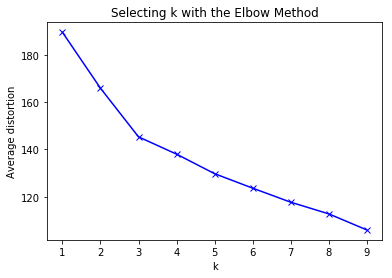

In [106]:
#Finding optimal no. of clusters
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

concrete_data_clusters = concrete_data.copy()
for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(concrete_data_clusters)
    prediction=model.predict(concrete_data_clusters)
    meanDistortions.append(sum(np.min(cdist(concrete_data_clusters, model.cluster_centers_, 'euclidean'), axis=1)) / concrete_data_clusters.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

The elbow method indicates a cluster of 3 is good.

In [107]:
final_model=KMeans(3)
final_model.fit(concrete_data_clusters)
prediction=final_model.predict(concrete_data_clusters)

#Append the prediction 
concrete_data_clusters["GROUP"] = prediction
concrete_data_clusters.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,GROUP
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,0
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51,1
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,1
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,0
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,0


In [111]:
grouped_by_cluster = concrete_data_clusters.groupby(concrete_data_clusters["GROUP"])
cluster_0 =  pd.DataFrame( grouped_by_cluster.get_group(0))
cluster_1 =  pd.DataFrame( grouped_by_cluster.get_group(1))
cluster_2 =  pd.DataFrame( grouped_by_cluster.get_group(2))

In [112]:
cluster_0.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,350.0,223.591143,77.457056,102.00,154.800,200.00,288.30,374.00
slag,350.0,176.595429,52.000997,86.00,135.775,172.80,202.85,359.40
ash,350.0,34.078000,55.922639,0.00,0.000,0.00,86.00,195.00
water,350.0,188.336286,18.465697,127.00,175.650,189.00,198.50,247.00
superplastic,350.0,5.350571,5.041596,0.00,0.000,6.00,9.10,22.10
coarseagg,350.0,943.352857,62.817438,811.00,907.925,944.70,978.40,1145.00
fineagg,350.0,748.061714,75.381142,594.00,694.100,750.00,800.10,943.10
age,350.0,39.682857,54.291788,3.00,28.000,28.00,28.00,365.00
strength,350.0,35.555857,17.067307,2.33,24.145,33.54,44.52,81.75
GROUP,350.0,0.000000,0.000000,0.00,0.000,0.00,0.00,0.00


Trying to figure any visible pattern in the clustering
But as we recall the five point summary looks almost similar to the original data.

# Evaluating models for each cluster

In [117]:
def evaluate_model_for_cluster(cluster_df):
    y_cluster = cluster_df['strength']
    X_cluster = cluster_df.drop('strength', axis=1)
    X_cluster = X_cluster.drop('GROUP', axis=1)
    X_train_cluster, X_test_cluster, y_train_cluster, y_test_cluster = train_test_split(X_cluster, y_cluster, test_size=0.30, random_state=1)
    random_regression = grid_random_forest.fit(X_train_cluster, y_train_cluster)
    y_pred_rf = random_regression.predict(X_test_cluster)
    random_regression.best_estimator_, random_regression.best_score_
    print(get_regression_metrics("hyper-tuned-RandomForest_cluster",y_test_cluster,y_pred_rf,8 ))


<font size =4>Evaluation for Cluster 0<font>

In [118]:
evaluate_model_for_cluster(cluster_0)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   31.8s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   56.8s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  1.3min finished


                     Regressor_name       mae      rmse  r2_score    adj_r2  \
0  hyper-tuned-RandomForest_cluster  4.217467  6.528708  0.867182  0.856114   

   explained_variance  
0            0.871732  


In [119]:
evaluate_model_for_cluster(cluster_1)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   33.0s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   58.4s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  1.3min finished


                     Regressor_name       mae      rmse  r2_score    adj_r2  \
0  hyper-tuned-RandomForest_cluster  3.312533  4.478784   0.90999  0.902411   

   explained_variance  
0            0.910061  


In [120]:
evaluate_model_for_cluster(cluster_2)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   36.9s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  1.5min finished


                     Regressor_name       mae      rmse  r2_score    adj_r2  \
0  hyper-tuned-RandomForest_cluster  4.098509  6.197788  0.866769  0.855184   

   explained_variance  
0            0.872787  


The Performance for individual clusters is not good compared to the model for overall data.

# Technical summary

- On Analysis , three clusters of concrete were found in the data
- The trial was done with Regularization ,hyper tuning with cross validation, Polynomial fitting , Dimensionality reduction with PCA , feature selection with Random Forest regressor
- the highest ranking goes for 	hyper-tuned-RandomForest_poly_feature_selection	
- the mean absolute error also known as standard error came to 3.7 
- the adjusted R-square value which explains the error captured by the model was 90 percentage.
- the explained variance of the model from cross validation accounted for 90 percentage.
3.704761	5.351112	0.901613	0.894781	0.902354
- the individual cluster models didnot perform so well.
- further to do - upsample individual clusters ,and then improve the model for each cluster.
